In [1]:
import pandas as pd
df1 = pd.read_csv("Online Payment Fraud Detection.csv")
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [3]:
df1.duplicated().sum()

np.int64(0)

In [4]:
df1.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [5]:
value_counts = df1['type'].value_counts(dropna=False)
percentage = (value_counts / value_counts.sum()) * 100
percentage_formatted = percentage.apply(lambda x: f"{x:.2f}%")
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage_formatted})
result

,Count,Percentage
type,,
CASH_OUT,373641,35.63%
PAYMENT,353873,33.75%
CASH_IN,227130,21.66%
TRANSFER,86753,8.27%
DEBIT,7178,0.68%


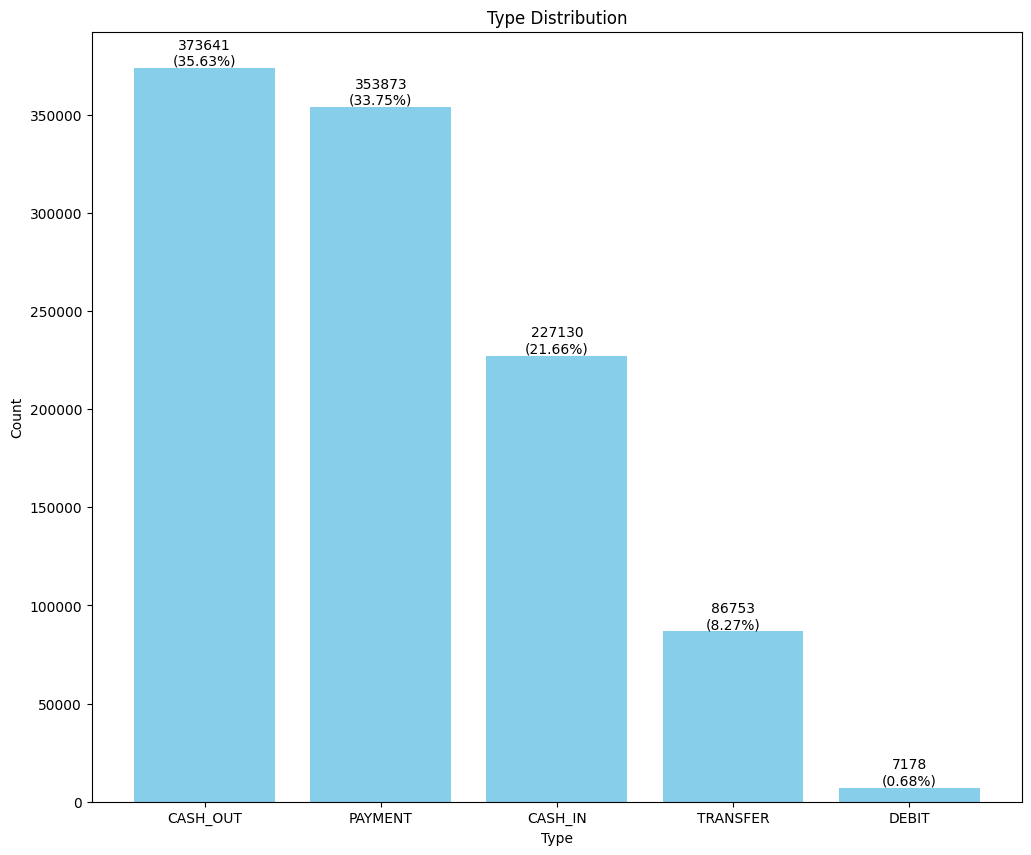

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
bars = plt.bar(result.index, result['Count'], color='skyblue')
for bar, count, percent in zip(bars, result['Count'], result['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{count}\n({percent})', ha='center', va='bottom')

plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [7]:
value_counts = df1['isFraud'].value_counts(dropna=False)
percentage = (value_counts / value_counts.sum()) * 100
percentage_formatted = percentage.apply(lambda x: f"{x:.2f}%")
result1 = pd.DataFrame({'Count': value_counts, 'Percentage': percentage_formatted})
result1

,Count,Percentage
isFraud,,
0,1047433,99.89%
1,1142,0.11%


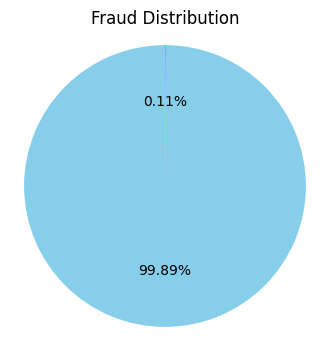

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.pie(result1['Count'],  autopct='%1.2f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Fraud Distribution')
plt.axis('equal')
plt.show()

In [9]:
notfraud = df1[df1.isFraud == 0]
notfraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0


In [10]:
notfraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.047433e+06,1.047433e+06,1.047433e+06,1.047433e+06,1.047433e+06,1.047433e+06,1047433.0
mean,2.694294e+01,1.575397e+05,8.736338e+05,8.947464e+05,9.787328e+05,1.114237e+06,0.0
std,1.559071e+01,2.541883e+05,2.972437e+06,3.009731e+06,2.297312e+06,2.416575e+06,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.213487e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.621497e+04,1.593700e+04,0.000000e+00,1.268638e+05,2.184841e+05,0.0
75%,3.900000e+01,2.134928e+05,1.358044e+05,1.750904e+05,9.169129e+05,1.150097e+06,0.0
max,9.500000e+01,6.419835e+06,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,0.0


In [11]:
fraud = df1[df1.isFraud == 1]
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [12]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1142.000000,1.142000e+03,1.142000e+03,1.142000e+03,1.142000e+03,1.142000e+03,1142.0
mean,48.272329,1.192629e+06,1.218636e+06,3.394432e+04,4.528661e+05,1.077940e+06,1.0
std,26.868203,2.030599e+06,2.229806e+06,5.012930e+05,1.662232e+06,2.434195e+06,0.0
min,1.000000,1.190000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,25.000000,8.607017e+04,7.802889e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,48.000000,3.531794e+05,3.487051e+05,0.000000e+00,0.000000e+00,1.379876e+04,1.0
75%,70.750000,1.248759e+06,1.218166e+06,0.000000e+00,1.617654e+05,9.685277e+05,1.0
max,95.000000,1.000000e+07,1.990000e+07,9.887819e+06,3.300000e+07,3.460000e+07,1.0


In [13]:
# fraud amount
print("Min Fraud Amount",fraud.amount.min())
print("Mean Fraud Amount",fraud.amount.mean())
print("Max Fraud Amount",fraud.amount.max())

Min Fraud Amount 119.0
Mean Fraud Amount 1192628.9320753065
Max Fraud Amount 10000000.0


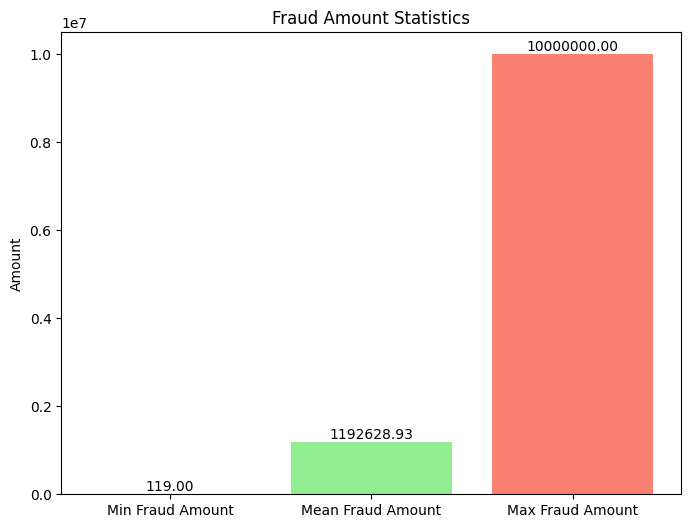

In [14]:
min_amount = fraud['amount'].min()
mean_amount = fraud['amount'].mean()
max_amount = fraud['amount'].max()

statistics = ['Min Fraud Amount', 'Mean Fraud Amount', 'Max Fraud Amount']
values = [min_amount, mean_amount, max_amount]

plt.figure(figsize=(8, 6))
bars = plt.bar(statistics, values, color=['lightblue', 'lightgreen', 'salmon'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{value:.2f}', ha='center', va='bottom')

plt.title('Fraud Amount Statistics')
plt.ylabel('Amount')
plt.grid(False)
plt.show()

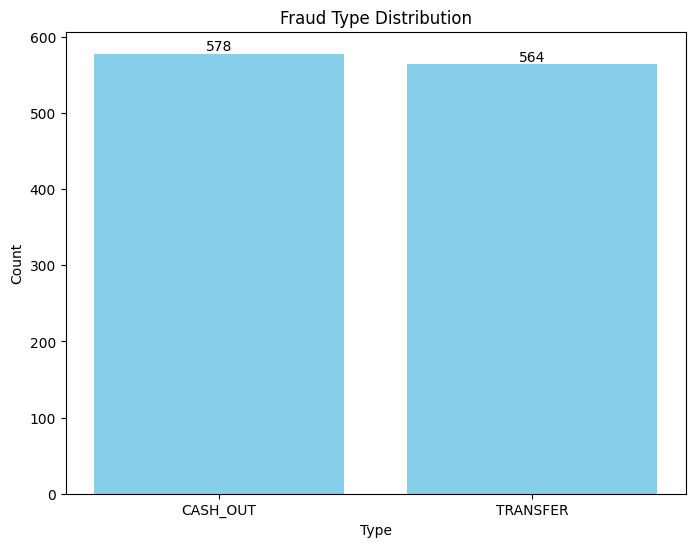

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = fraud['type'].value_counts(dropna=False)

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')

for bar, count in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{count}', ha='center', va='bottom')

plt.title('Fraud Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [16]:
print('Fraudulent Transaction: {}'.format(len(fraud)))
print('Not Fraudulent Transaction: {}'.format(len(notfraud)))

Fraudulent Transaction: 1142
Not Fraudulent Transaction: 1047433


# **Base Model**

In [17]:
df2 = df1.drop(columns = {"nameOrig","nameDest"})
df2.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1


In [18]:
df3 = pd.get_dummies(df2, columns=['type'], drop_first=True)
df3 = df3.astype(int)
df3.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839,170136,160296,0,0,0,0,0,1,0
1,1,1864,21249,19384,0,0,0,0,0,1,0
2,1,181,181,0,0,0,1,0,0,0,1


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Splitting the data
X = df3.drop('isFraud', axis=1)
y = df3['isFraud']

# Splitting the original imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Base Random Forest:")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

# 2. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

print("\nBase XGBoost:")
print(classification_report(y_test, xgb_predictions))
print(confusion_matrix(y_test, xgb_predictions))

Base Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.99      0.76      0.86       228

    accuracy                           1.00    209715
   macro avg       1.00      0.88      0.93    209715
weighted avg       1.00      1.00      1.00    209715

[[209486      1]
 [    55    173]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Base XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.97      0.80      0.88       228

    accuracy                           1.00    209715
   macro avg       0.99      0.90      0.94    209715
weighted avg       1.00      1.00      1.00    209715

[[209482      5]
 [    46    182]]


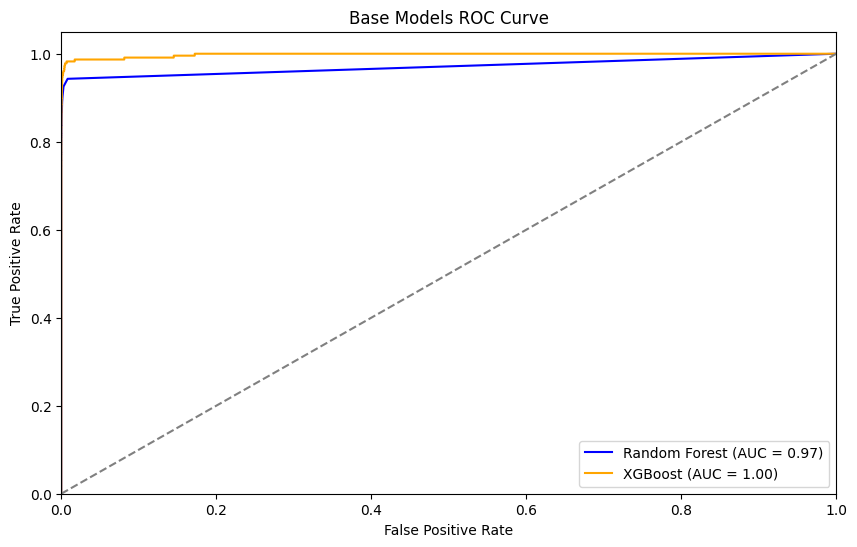

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='orange', label='XGBoost (AUC = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Base Models ROC Curve')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

# **Undersampling**

In [21]:
Notfraud_Sample = notfraud.sample(n=1142)
new_df = pd.concat([Notfraud_Sample, fraud], axis=0)
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
439716,18,DEBIT,6340.56,C1069950072,0.0,0.00,C2119889806,532555.06,538895.62,0
784921,39,CASH_OUT,25902.27,C1423485053,35050.0,9147.73,C2084540626,166063.60,191965.87,0
888606,42,CASH_IN,235247.89,C530081459,14900000.0,15100000.00,C2061687241,1787342.26,1552094.37,0
872960,42,PAYMENT,13433.78,C400196290,0.0,0.00,M1508626966,0.00,0.00,0
955788,44,PAYMENT,391.76,C1551963946,15834.0,15442.24,M1407032518,0.00,0.00,0


In [22]:
new_df = new_df.drop(columns = {"nameOrig","nameDest"})
new_df = pd.get_dummies(new_df, columns=['type'], drop_first=True)
new_df = new_df.astype(int)
new_df.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
439716,18,6340,0,0,532555,538895,0,0,1,0,0
784921,39,25902,35050,9147,166063,191965,0,1,0,0,0
888606,42,235247,14900000,15100000,1787342,1552094,0,0,0,0,0


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Splitting the data
X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']

# Splitting the original imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Random Forest
urf_model = RandomForestClassifier(random_state=42)
urf_model.fit(X_train, y_train)
urf_predictions = urf_model.predict(X_test)

print("Undersampling Random Forest:")
print(classification_report(y_test, urf_predictions))
print(confusion_matrix(y_test, urf_predictions))

# 2. XGBoost
uxgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
uxgb_model.fit(X_train, y_train)
uxgb_predictions = uxgb_model.predict(X_test)

print("\nUndersampling XGBoost:")
print(classification_report(y_test, uxgb_predictions))
print(confusion_matrix(y_test, uxgb_predictions))

Undersampling Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       229
           1       0.97      1.00      0.98       228

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457

[[221   8]
 [  1 227]]

Undersampling XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.98      1.00      0.99       228

    accuracy                           0.99       457
   macro avg       0.99      0.99      0.99       457
weighted avg       0.99      0.99      0.99       457

[[224   5]
 [  1 227]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:23:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


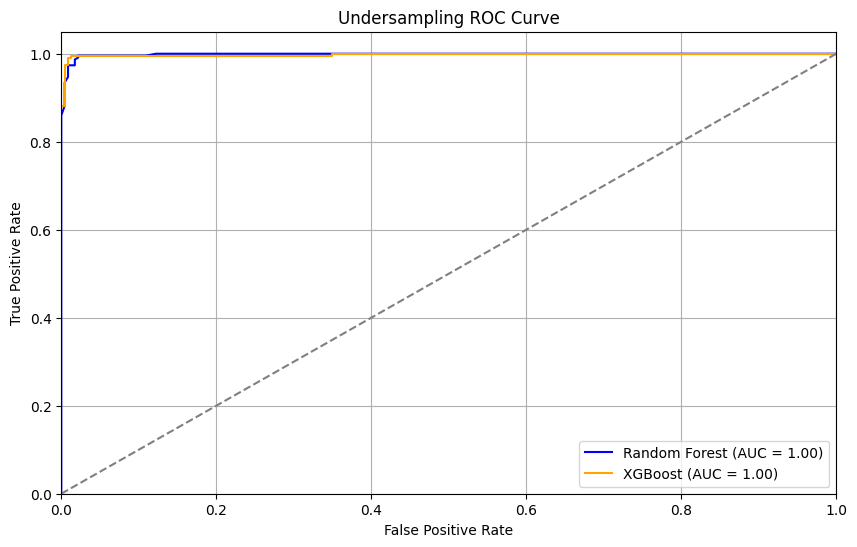

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

urf_probs = urf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
urf_fpr, urf_tpr, _ = roc_curve(y_test, urf_probs)
urf_auc = auc(urf_fpr, urf_tpr)

uxgb_probs = uxgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
uxgb_fpr, uxgb_tpr, _ = roc_curve(y_test, uxgb_probs)
uxgb_auc = auc(uxgb_fpr, uxgb_tpr)

plt.figure(figsize=(10, 6))
plt.plot(urf_fpr, urf_tpr, color='blue', label='Random Forest (AUC = {:.2f})'.format(urf_auc))
plt.plot(uxgb_fpr, uxgb_tpr, color='orange', label='XGBoost (AUC = {:.2f})'.format(uxgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Undersampling ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# **Oversampling**

In [25]:
over_df = df1.copy()
over_df = over_df.drop(columns = {'nameOrig','nameDest'})

In [26]:
over_df = pd.get_dummies(over_df, columns=['type'], drop_first=True)
over_df = over_df.astype(int)
over_df.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839,170136,160296,0,0,0,0,0,1,0
1,1,1864,21249,19384,0,0,0,0,0,1,0
2,1,181,181,0,0,0,1,0,0,0,1


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Splitting the data
X = over_df.drop('isFraud', axis=1)
y = over_df['isFraud']

# Splitting the original imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_model.predict(X_test)

print("Oversampling Random Forest:")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

# 2. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_model.predict(X_test)

print("\nOversampling XGBoost:")
print(classification_report(y_test, xgb_predictions))
print(confusion_matrix(y_test, xgb_predictions))

Oversampling Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.97      0.77      0.86       228

    accuracy                           1.00    209715
   macro avg       0.99      0.89      0.93    209715
weighted avg       1.00      1.00      1.00    209715

[[209482      5]
 [    52    176]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:26:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Oversampling XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.70      0.87      0.77       228

    accuracy                           1.00    209715
   macro avg       0.85      0.93      0.89    209715
weighted avg       1.00      1.00      1.00    209715

[[209402     85]
 [    30    198]]


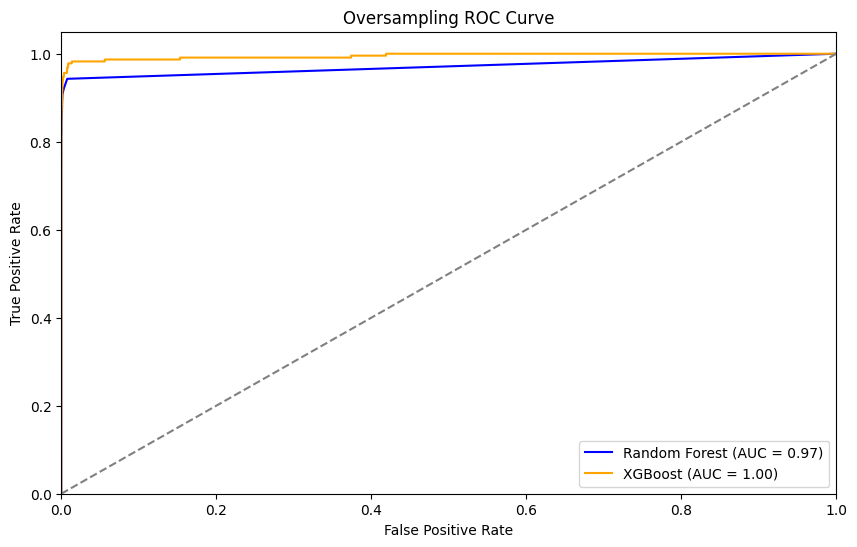

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='orange', label='XGBoost (AUC = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Oversampling ROC Curve')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()